# Regression

## Theoretical questions :

Q 1

1. Explain Supervised vs. Unsupervised Learning


Supervised Learning:
Supervised learning is a type of machine learning where the model is trained on a labeled dataset. This means that each input data point is paired with the correct output.

Goal: Learn a function that maps inputs to outputs based on example input-output pairs.

Types:

Regression: Predicting continuous values (e.g., predicting house prices).

Classification: Predicting categories (e.g., spam or not spam).

Example:
If we have data of students’ study hours (input) and their exam scores (output), we can train a model to predict scores based on hours.

Applications:
Email spam detection

Credit risk assessment

Weather prediction

Medical diagnosis

Unsupervised Learning:
Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. The algorithm tries to find patterns or structure in the data without predefined labels.

Goal: Explore the structure or distribution in data to learn more about it.

Types:

Clustering: Grouping similar items (e.g., customer segmentation).

Dimensionality Reduction: Reducing the number of input variables (e.g., PCA).

Example:
Given customer data with no labels, an algorithm can group them into segments based on behavior patterns.

Applications:
Market segmentation

Recommendation systems

Anomaly detection

Document clustering

## Practical Tasks

### Task-1 : House Price Prediction

#### 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Hyderabad.csv')

In [3]:
df.shape

(2518, 40)

In [4]:
df = df.iloc[:2434]

In [5]:
df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Stadium                0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2434 non-null   int64 
 1   Area                 2434 non-null   int64 
 2   Location             2434 non-null   object
 3   No. of Bedrooms      2434 non-null   int64 
 4   Resale               2434 non-null   int64 
 5   MaintenanceStaff     2434 non-null   int64 
 6   Gymnasium            2434 non-null   int64 
 7   SwimmingPool         2434 non-null   int64 
 8   LandscapedGardens    2434 non-null   int64 
 9   JoggingTrack         2434 non-null   int64 
 10  RainWaterHarvesting  2434 non-null   int64 
 11  IndoorGames          2434 non-null   int64 
 12  ShoppingMall         2434 non-null   int64 
 13  Intercom             2434 non-null   int64 
 14  SportsFacility       2434 non-null   int64 
 15  ATM                  2434 non-null   int64 
 16  ClubHo

In [7]:
df.duplicated().sum()

np.int64(520)

In [8]:
df[df.duplicated()]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
20,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
21,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
22,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
24,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,4500000,1050,Trimalgherry,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2357,12400000,1725,Begumpet,3,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2386,14500000,1834,Manikonda,3,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2427,17000000,2260,Hitech City,3,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(1914, 40)

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

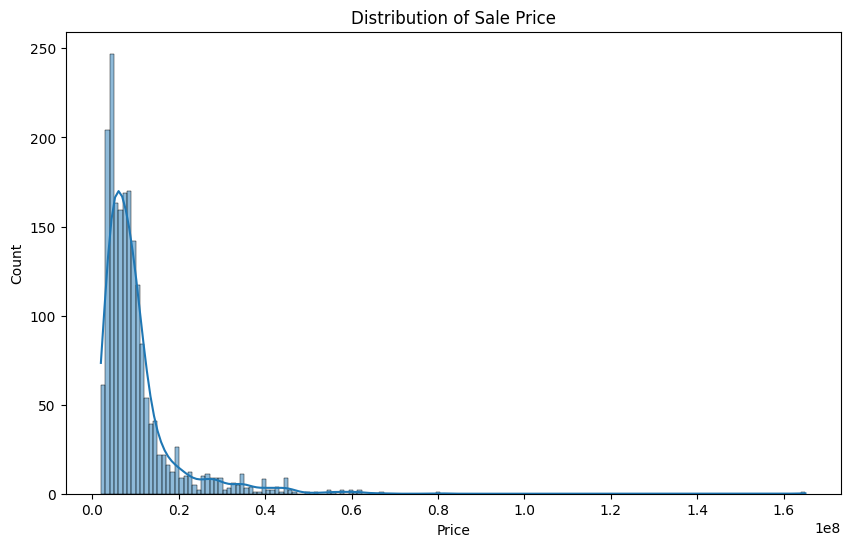

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

In [14]:
df['Price'].skew()

np.float64(4.69112427876082)

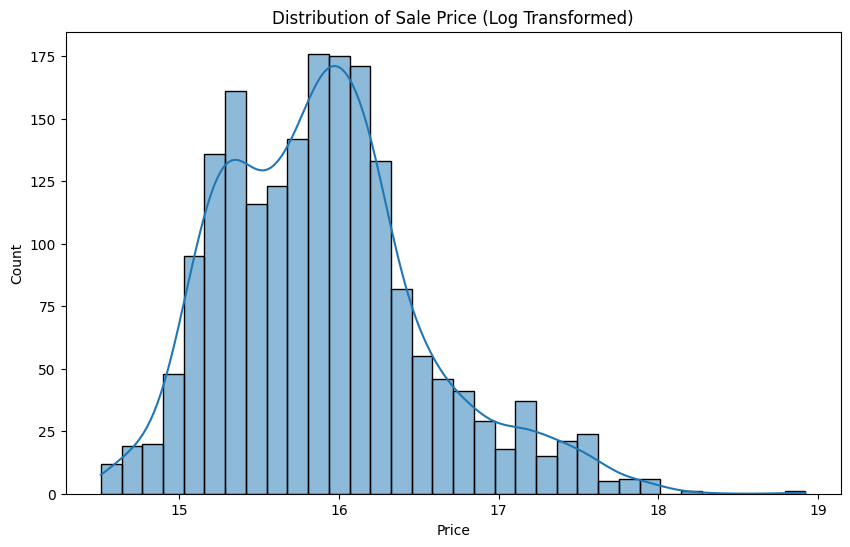

New Skewness: 0.6752286367888145


In [15]:
df['Price'] = np.log1p(df['Price'])

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Sale Price (Log Transformed)')
plt.show()

print("New Skewness:", df['Price'].skew())


In [16]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,...,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,15.900367,1673.716823,2.647335,0.257053,0.118077,0.475444,0.446186,0.356322,0.289969,0.333333,...,0.706374,0.075235,0.323929,0.051202,0.032393,0.026646,0.044410,0.053814,0.053814,0.031870
std,0.638641,781.889191,0.693842,0.437123,0.322784,0.499527,0.497226,0.479037,0.453866,0.471528,...,0.455542,0.263839,0.468096,0.220466,0.177087,0.161088,0.206057,0.225709,0.225709,0.175701
min,14.508658,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.394799,1175.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.882373,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.222456,1875.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.921456,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Feature Engineering & Preprocessing

In [48]:
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True, dtype=int)

In [49]:
df_encoded.shape

(1914, 277)

In [50]:
df_encoded.sample(5)

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_Zamistanpur,Location_chandrayangutta,Location_financial District,Location_hyderabad,Location_manneguda,Location_muthangi,Location_new nallakunta,Location_nizampet road,Location_raidurgam,Location_west venkatapuram
1130,15.702580,1380,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587,16.023785,1792,3,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1709,15.444751,1165,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,15.775464,1190,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1192,15.663651,1270,2,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
x = df_encoded.drop(['Price'],axis=1)
y = df_encoded['Price']

In [52]:
x.sample(5)

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Location_Zamistanpur,Location_chandrayangutta,Location_financial District,Location_hyderabad,Location_manneguda,Location_muthangi,Location_new nallakunta,Location_nizampet road,Location_raidurgam,Location_west venkatapuram
1147,2607,3,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2201,1150,2,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1153,2813,3,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1666,1216,2,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1958,1834,3,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y.sample(5)

762     15.163324
1443    15.805711
2158    14.746099
264     15.297115
2398    15.520259
Name: Price, dtype: float64

In [54]:
scaler = StandardScaler()

In [55]:
x_scl = scaler.fit_transform(x)
x_scl = pd.DataFrame(x_scl, columns=x.columns)

In [56]:
x_scl

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Location_Zamistanpur,Location_chandrayangutta,Location_financial District,Location_hyderabad,Location_manneguda,Location_muthangi,Location_new nallakunta,Location_nizampet road,Location_raidurgam,Location_west venkatapuram
0,-0.426920,-0.933216,-0.588210,-0.365905,1.050379,1.114100,1.344043,1.564816,1.414214,1.527905,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
1,2.333783,1.950036,-0.588210,-0.365905,1.050379,1.114100,1.344043,1.564816,1.414214,1.527905,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
2,-0.455064,-0.933216,-0.588210,-0.365905,1.050379,-0.897586,-0.744024,-0.639053,-0.707107,1.527905,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
3,-0.484488,0.508410,1.700072,-0.365905,-0.952037,-0.897586,-0.744024,-0.639053,-0.707107,-0.654491,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
4,-0.676381,-0.933216,-0.588210,-0.365905,-0.952037,-0.897586,1.344043,-0.639053,-0.707107,-0.654491,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,-0.542056,-0.933216,-0.588210,-0.365905,-0.952037,-0.897586,-0.744024,-0.639053,-0.707107,-0.654491,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
1910,-0.860598,-0.933216,-0.588210,-0.365905,-0.952037,-0.897586,-0.744024,-0.639053,-0.707107,-0.654491,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
1911,-0.156990,0.508410,-0.588210,-0.365905,-0.952037,-0.897586,-0.744024,-0.639053,-0.707107,-0.654491,...,-0.039621,43.737855,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863
1912,1.696698,0.508410,1.700072,2.732952,-0.952037,-0.897586,1.344043,-0.639053,1.414214,-0.654491,...,-0.039621,-0.022863,-0.032342,-0.022863,-0.022863,-0.032342,-0.039621,-0.032342,-0.022863,-0.022863


### 2. Build a Simple Linear Regression model to predict the Sale price of the house.

In [57]:
x_area = x_scl[['Area']] 
y = df['Price'] 

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_area,y,test_size=0.2)

In [59]:
model = LinearRegression()

In [60]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
y_pred = model.predict(x_test)

In [62]:
r2 = r2_score(y_test, y_pred)

In [63]:
r2

0.6947687207699391

In [64]:
print(x_test.shape)
print(y_test.shape)

(383, 1)
(383,)


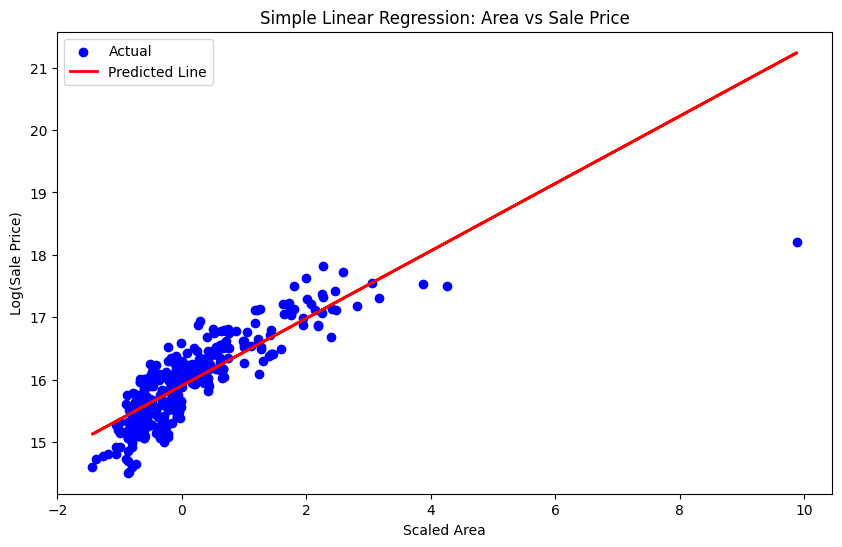

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Simple Linear Regression: Area vs Sale Price')
plt.xlabel('Scaled Area')
plt.ylabel('Log(Sale Price)')
plt.legend()
plt.show()

### 3. Build Multiple Linear Regression model to predict Sale price of the house.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_scl, y, test_size=0.2)

In [67]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
y_pred = model.predict(x_test)

In [69]:
r2 = r2_score(y_test, y_pred)

In [70]:
r2

0.8271960311652606

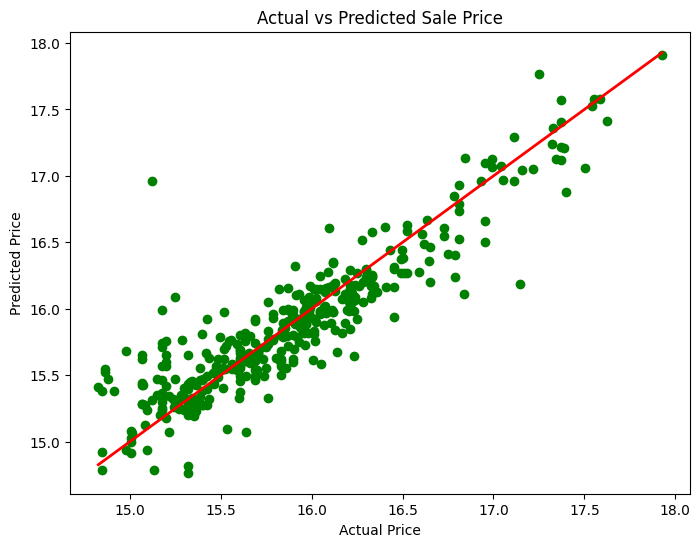

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) 
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()


### 4. Use dimensionality reduction technique PCA and build Multiple Linear Regression model to predict Sale price of the house.

In [72]:
pca = PCA(n_components=75)

In [ ]:
x_pca = pca.fit_transform(x_scl)

In [74]:
x_pca.shape

(1914, 75)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
y_pred = model.predict(x_test)

In [78]:
r2 = r2_score(y_test, y_pred)

r2

0.7644660016314

### 5. Build a model using Lasso and Ridge regression to reduce model complexity.

#### Lasso

In [79]:
lasso = Lasso(alpha=0.1) 
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [80]:
r2_lasso = r2_score(y_test, y_pred)

In [81]:
r2_lasso

0.7644660016314

#### Ridge

In [82]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [83]:
r2_ridge = r2_score(y_test, y_pred)

r2_ridge

0.7644660016314

### 6. Build an SVR model to predict Sale price of the house.

In [84]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [85]:
svr = SVR(kernel='rbf', C=100, gamma=0.00001, epsilon=0.1)
svr.fit(x_train, y_train_log) 

,kernel,'rbf'
,degree,3
,gamma,1e-05
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [86]:
y_pred_log = svr.predict(x_test)

In [87]:
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

In [88]:
r2 = r2_score(y_test_actual, y_pred)

In [89]:
r2

-0.39238602975512005

### 7. Build Decision Tree Regressor to predict Sale price of the house.

In [90]:
dtree = DecisionTreeRegressor(max_depth=5)

In [91]:
dtree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [92]:
y_pred = dtree.predict(x_test)

In [93]:
r2 = r2_score(y_test, y_pred)

In [94]:
r2

0.582341598835217

### 8. Build Random Forest Regression model to predict Sale price of the house.

In [95]:
rf = RandomForestRegressor(n_estimators=10, max_depth=10)

In [96]:
rf.fit(x_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [97]:
y_pred = rf.predict(x_test)

In [98]:
r2 = r2_score(y_test, y_pred)

In [99]:
r2

0.7651826905716356

### 9. Use GridsearchCV and RandomizedsearchCV for tuning hyperparameters and fit your model on the optimal parameters.

#### Randomized Search CV

In [100]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20]
}


In [ ]:
rf = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,  
                                   cv=5,      
                                   scoring='r2',
                                   n_jobs=-1)

random_search.fit(x_train, y_train)

c:\Users\soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 25 is smaller than n_iter=50. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 10}

#### Grid Search CV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None]
    }


In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [10, 15, ...], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 100}